## Recap of Previous Lessons

In the previous 3 lessons we covered various topics that helped establish the conceptual and mathematical foundations of machine learning in general. This included a basic introduction to linear regression, understanding of the techniques used to evaluate the success and performance of machine learning models, and a rigorous analysis of the math behind classification and the corresponding logistic regression algorithm.

- The mathematical foundations (linear algebra, statistic, calculus) for ML ⛏️
- An introduction to basic linear regression and polynomial linear regression 📈
- The math and difference between classification and regression.

In this lesson we will (finally) expand these concepts into the realm of deep learning.

- The conceptual objective of neural networks.
- The building blocks: Perceptrons.
- Various implementations (Pytorch vs Tensorflow w/ optional Keras API)
- Classical neural networks: Multi-layer perceptrons
- Introduction to advanced neural networks: CNNs & RNNs

## What is a Neural Network? 🧠

A neural network can be described as a graph, or a collection of nodes (or *neurons*) connected to each other by edges. Data enters the neural network through one side and exits through the other side. *Such networks are often called "feed-forward"* networks.

<img src="./media/basic_nn.jpg" alt="a basic neural network" width="400" height="auto">

We can connect back neural networks to our original concept of a weighted sum by characterizing each node in the input layer as carrying inputs $x_1, x_2, \ldots, x_n$ and having each edge between the input and output node as the weights $w_1, w_2, \ldots, w_n$. 

<img src="./media/basic_nn2.png" alt="a basic neural network" width="400" height="auto">

- **Logistic regression is a simple binary classifier that can be represented as a single-layer neural network. However, neural networks extend beyond logistic regression by adding hidden layers to model more complex decision boundaries.**

- **Although a basic linear regression model can be represented in a neural network, we can apply certain functions to the weighted sum to transform a linear decision boundary into a non-linear one (e.g., a curve instead of a straight line).**

- **The objective of a neural network is to classify data into 2 or more categories. Logistic regression can be thought of as the original simple binary classification problem, but neural networks deal with more complicated decision boundaries.**

Fundamentally each neuron can represent a different weight for a single input example.

- If an image has $1920 \cdot 1080 \approx 2000000$ pixels, then each of these pixels could be mapped to an input node.

- By adding more hidden layers we are attempting to abstract clusters of neurons into "average" weights with the hope that clusters of neurons can and will represent more complicated features in the image such as edges, shapes, and eventually even more abstract concepts like faces.

Lets start now by discussing the building blocks of such a network!

## Perceptrons

A perceptron can be thought of as a singular system, a single unit that applies a function.

<img src="./media/perceptron_outline.png" width="600px">

Often times the weights are on the edges themselves and the weighted sum and activation function are grouped into the same "neuron".

So the following image is a more simplified view of a perceptron:

<img src="./media/perceptron_outline_simplified.png" width="600px">

A perceptron in its simplest implementation computes a weighted sum. The purpose of the activation function is to determine if the weighted sum is greater than some threshold. If it is then we output `True` (1) otherwise we output `False` (0).

- In other words the output is binary and the activation function resembles a **step function**.

---

### Mathematical Steps

1) Compute weighted sum

$$z = X^TW$$

$$z = w_1x_1 + w_2x_2 + \ldots + w_nx_n$$

2) Define threshold activation function

$$
h(z) =
\begin{cases} 
0 & \text{if } z < \text{Threshold} \\
1 & \text{if } z \geq \text{Threshold}
\end{cases}
$$

3) Update weights as defined by gradient descent

$$
w_{i, j} = w_{i, j} - \alpha (\hat{y}_j - y_j)x_i
$$

---

While this perceptron model we have created works beautifully in linearly separable problem sets, it struggles heavily in situations where datapoints are not linearly separable.

To show this, lets create some code!

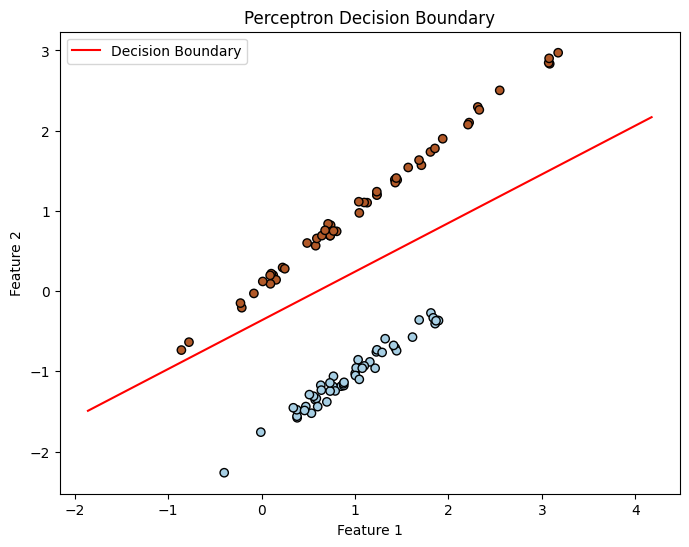

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Train a perceptron model
model = Perceptron()
model.fit(X, y)

# Extract coefficients and intercept
w = model.coef_[0]
b = model.intercept_[0]

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, 'r-', label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.show()


Slope: 0.37930585659554084
Intercept: 0.542378029996429


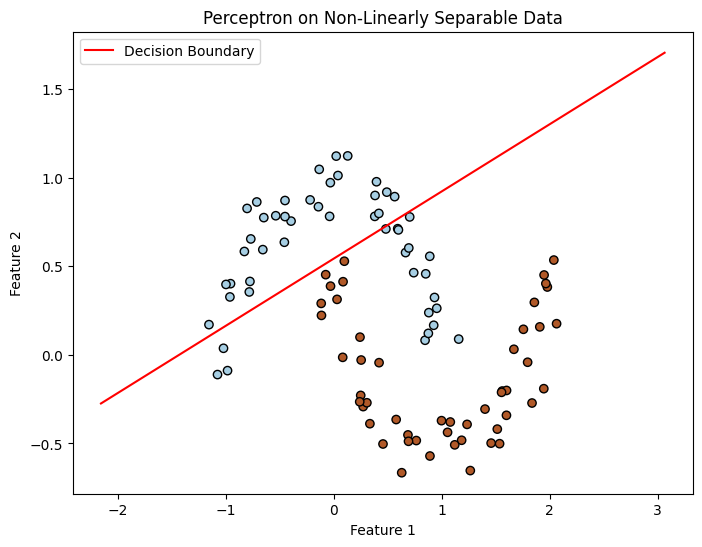

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_moons

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=40)

# Train a perceptron model
model = Perceptron()
model.fit(X, y)

# Extract coefficients and intercept
w = model.coef_[0]
b = model.intercept_[0]

# Print slope and intercept
slope = -w[0] / w[1]
intercept = -b / w[1]
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, 'r-', label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron on Non-Linearly Separable Data")
plt.legend()
plt.show()


Animation saved as 'perceptron_training_on_separable.gif' in media folder.


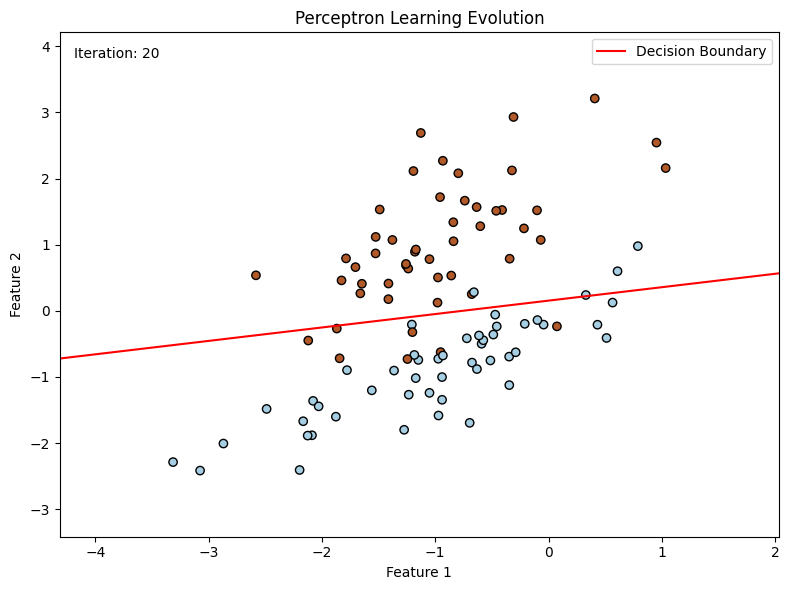

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

# Generate a dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=20)

# Initialize the perceptron model with partial_fit capability
model = Perceptron(max_iter=1, tol=None)

# Pre-compute all model states for animation
n_iterations = 20
model_states = []

# Store initial state before training
w = np.zeros(2)  # Initial zero weights
b = 0            # Initial zero bias
model_states.append((w.copy(), b))

# Train model one iteration at a time and save states
for i in range(n_iterations):
    model.partial_fit(X, y, classes=np.unique(y))
    model_states.append((model.coef_[0].copy(), model.intercept_[0]))

# Setup figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)z
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Perceptron Learning Evolution")

# Scatter plot of data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Initialize decision boundary line
x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
boundary, = ax.plot([], [], 'r-', label='Decision Boundary')
iteration_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
ax.legend()

# Animation function that uses pre-computed states
def update(i):
    w, b = model_states[i]
    
    # Handle potential division by zero
    if abs(w[1]) < 1e-10:  # If w[1] is very close to zero
        # Draw a vertical line if needed
        if w[0] != 0:
            x_const = -b / w[0]
            boundary.set_data([x_const, x_const], [X[:, 1].min() - 1, X[:, 1].max() + 1])
        else:
            # If both w[0] and w[1] are zero, no line to draw
            boundary.set_data([], [])
    else:
        # Normal case - calculate slope and intercept
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        y_values = slope * x_values + intercept
        boundary.set_data(x_values, y_values)
    
    # Update iteration text
    iteration_text.set_text(f'Iteration: {i}')
    
    return boundary, iteration_text

# Create animation
ani = animation.FuncAnimation(fig, update, frames=n_iterations+1, interval=500, blit=True)

# Save the animation (this will ensure it's actually rendered)
try:
    ani.save('./media/perceptron_training_on_separable.gif', writer='pillow', fps=2)
    print("Animation saved as 'perceptron_training_on_separable.gif' in media folder.")
except Exception as e:
    print(f"Could not save animation: {e}")
    print("Try installing pillow: pip install pillow")

# This will display in interactive environments
plt.tight_layout()
plt.show()

The gif below shows the evolution of the decision boundary generated by the perceptron over time. Each iteration represents one pass through the entire dataset.

![file](./media/perceptron_training_on_separable.gif)

In the visualization, the decision boundary line represents exactly where this weighted sum equals zero (z = 0). Points on one side of the line have a weighted sum greater than zero and are classified as one class, while points on the other side have a weighted sum less than zero and are classified as the other class.

The animation shows how the perceptron algorithm adjusts the weights and bias with each iteration, moving the decision boundary to better separate the two classes. This captures the essence of the perceptron learning rule: when the model makes a mistake, it updates its weights proportionally to correct the error.

**However note that this only works reasonably well with linearly separable data!**

Beneath is the same experiment, but run on non-linearly separable circlularly graphed datapoints.

Animation saved as 'perceptron_training_on_nonseparable.gif'


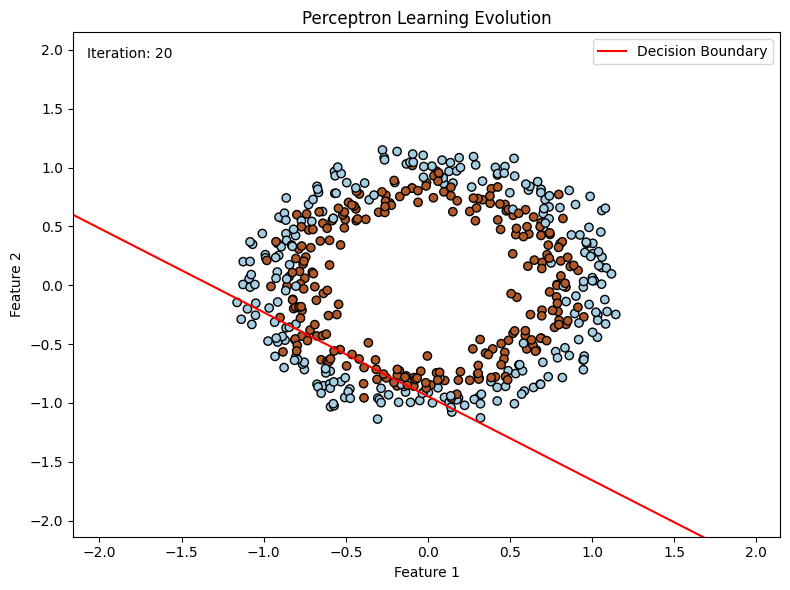

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_circles

# Generate a dataset
X, y = make_circles(n_samples=500, noise=0.1)
# Initialize the perceptron model with partial_fit capability
model = Perceptron(max_iter=1, tol=None)

# Pre-compute all model states for animation
n_iterations = 20
model_states = []

# Store initial state before training
w = np.zeros(2)  # Initial zero weights
b = 0            # Initial zero bias
model_states.append((w.copy(), b))

# Train model one iteration at a time and save states
for i in range(n_iterations):
    model.partial_fit(X, y, classes=np.unique(y))
    model_states.append((model.coef_[0].copy(), model.intercept_[0]))

# Setup figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Perceptron Learning Evolution")

# Scatter plot of data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Initialize decision boundary line
x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
boundary, = ax.plot([], [], 'r-', label='Decision Boundary')
iteration_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
ax.legend()

# Animation function that uses pre-computed states
def update(i):
    w, b = model_states[i]
    
    # Handle potential division by zero
    if abs(w[1]) < 1e-10:  # If w[1] is very close to zero
        # Draw a vertical line if needed
        if w[0] != 0:
            x_const = -b / w[0]
            boundary.set_data([x_const, x_const], [X[:, 1].min() - 1, X[:, 1].max() + 1])
        else:
            # If both w[0] and w[1] are zero, no line to draw
            boundary.set_data([], [])
    else:
        # Normal case - calculate slope and intercept
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        y_values = slope * x_values + intercept
        boundary.set_data(x_values, y_values)
    
    # Update iteration text
    iteration_text.set_text(f'Iteration: {i}')
    
    return boundary, iteration_text

# Create animation
ani = animation.FuncAnimation(fig, update, frames=n_iterations+1, interval=500, blit=True)

# Save the animation (this will ensure it's actually rendered)
try:
    ani.save('./media/perceptron_training_on_nonseparable.gif', writer='pillow', fps=2)
    print("Animation saved as 'perceptron_training_on_nonseparable.gif'")
except Exception as e:
    print(f"Could not save animation: {e}")
    print("Try installing pillow: pip install pillow")

# This will display in interactive environments
plt.tight_layout()
plt.show()

Unlike the experiment on two separable datasets, a single line is insufficent to separate non-linearly separable date!

<img src="./media/perceptron_training_on_nonseparable.gif">


## Pitfalls of Simple Perceptrons

Hopefully it should be apparent that a single perceptron generates a single line or (with 3d datapoints a plane) that fails to capture relationships that are not linearly separable.

Suppose for our first example, **we had 3 clusters instead of two, how many lines would be required to separate the three clusters?**

- **In the best case scenario we would need two lines to separate each cluster into its own region.**

Similarly for 4 clusters we would want three 3 lines (3 perceptrons), and the trend continues (assuming linearly separable datapoints).

However, there are many complex relationships that cannot be represented as or boiled down to linear relationships. Is there a way we could alter or enhance the logic of a basic binary classifier esque perceptron to accomodate this non-linearity?

One hypothesis is that we could simply add more layers. In other words **we could apply a linear function to the sums of multiple other linear functions. (the weighted sum of several weighted sums).**

- *Would such a function be non-linear?*

- Applying linearity to a linear function may help abstract and define more complicated linear relationships, but it is not sufficient to express non-linearity. In other words, **stacking more linear transformations (even with multiple layers) would still result in an overall linear transformation, as a composition of linear functions remains linear**.

## Introducing non-linearity

Ask yourself, what function can take in some linear inputs but transform them into non-linear outputs?

- Well the simple answer would be parabolas and other quadratic functions.

However, a simple quadratic function does not cover the capabilities or features we want from this transformative function, which are as follows:

1) The function should preferably output a probability (a number from 0 to 1).

2) The function should be relatively computationally inexpensive (no complex parabolas or super high dimensional stuff)

3) The curve of the function should be smooth and ideally differentiable along its entirety (no holes or undefined points in the function or its gradient).

4) The function should overall just be simple and predictable in how it behaves.

Fortunately we have already tackled this topic in prior lessons when discussing how non-linearity can be applied to any weighted sum.

The only difference here is the context in which the weighted sum is being computed!

Recall the following:

Sigmoid function: $f(z) = \frac{1}{1 + e^{-z}}$

Rectified Linear Unit (ReLU): $f(z) = \max(0, z)$

### Graphs of Nonlinear functions:

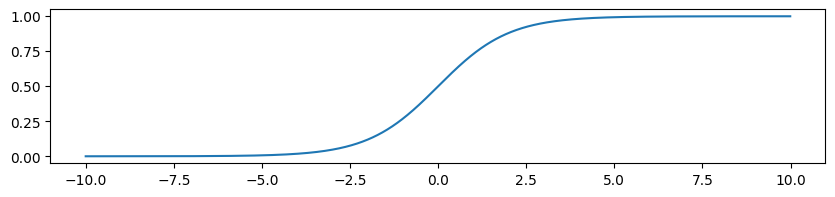

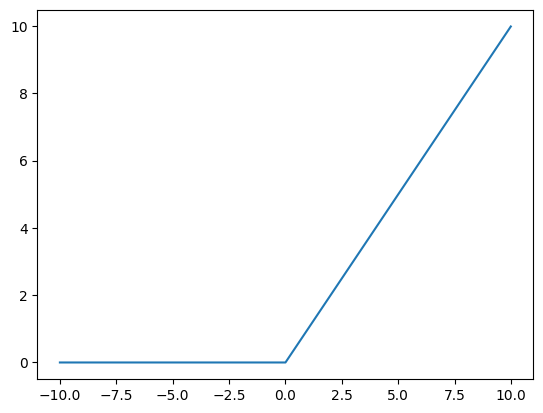

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Graph of sigmoid function
x = np.arange(-10, 10, 0.01)
y = 1 / (1 + np.exp(-x))

# Ensure that plot is representative (make plot wide to show the smoothness of the curve)
plt.figure(figsize=(10,2))

plt.plot(x, y)
plt.show()

# Graph of Relu function
x = np.arange(-10, 10, 0.01)
y = np.maximum(0, x)

plt.plot(x, y)
plt.show()

Our conversations thus far, especially in the prior lesson have revolved around the usage of the sigmoid function!

- The loss function and gradient calculations we have discussed have been with the assumption of an underlying sigmoid activation.

However, while sigmoid has been a useful tool in our discussions so far, it's important to consider whether it's always the best choice. As we move forward, we'll examine its strengths and weaknesses—particularly in terms of vanishing gradients and computational efficiency—and compare it to ReLU, another widely used activation function that addresses some of sigmoid’s limitations.

## Expanding and Implementing a MLP Layer

While a singular perceptron can be useful to capture a simple, singular trend, we can initialize and embed several perceptrons in the same layer.

- The only difference in how the perceptrons calculate the weighted sum would be the weights in themselves.

![Multiperceptron Diagram](./media/multi_perceptron_diagram.png)

Each weighted sum here: $z_1$ and $z_2$ would apply two distinct sets of weights to the same input!

- In doing so, each perceptron will create a different "line" or classification boundary which we will come to see can be leveraged to capture various features in the data.

A layer in which every input neuron (in this case each neuron represents a data point) is connected to every output neuron is called a **dense layer**.

- Since both $z_1$ and $z_2$ operate on all of the neurons behind them, those input neurons and these perceptrons form a dense layer.

If you read lesson 0, it also makes intuitive sense to place all our weights in the same matrix, where the number of rows is the number of weights as a whole and the number of columns is the number of perceptrons or output nodes.

Lets implement a basic dense layer!

In [3]:
import tensorflow as tf
import torch
from torch import nn

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_inputs, n_outputs):
        super(DenseLayer, self).__init__()
    
        # Initialize weights
        # (The add_weight method is provided in the Layer parent class)
        self.weights = self.add_weight([n_inputs, n_outputs])
        self.bias = self.add_weight([1, n_outputs])
        
    def call(self, inputs):
        
        # Pass the input data into the weights and get that weighted sum
        z = tf.matmul(inputs, self.weights) + self.bias
        
        # Return the sigmoid(z) (i.e. apply the non-linearity)
        return tf.math.sigmoid(z)
    
class DenseLayer(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(DenseLayer, self).__init__()
        
        # Initialize the weights and biases
        # randn creates an explicitly random set of values in matrix form
        self.weights = nn.Parameter(torch.randn(n_inputs, n_outputs, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, n_outputs, requires_grad=True))
        
    def forward(self, inputs):
        
        # Pass the input data into the weights and get that weighted sum
        z = tf.matmul(inputs, self.weights) + self.bias
        
        # Return the sigmoid(z) (i.e. apply the non-linearity)
        return tf.math.sigmoid(z)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Thankfully both tensorflow and pytorch have built in equivalents of a simple linear, dense layer so we don't have to write this code ourselves:

Tensorflow:

```python

    # Creating a dense layer with two output perceptrons
    layer = tf.keras.layers.Dense(units=2)

```

Pytorch:

```python

    # Creating a dense layer which accepts in 10 values and evaluates them on two perceptrons.
    layer = nn.Linear(in_features = 10, out_features= 2)

```

Ultimately a deep neural network is a stack of several layers of these perceptrons and the accompanying non-linearity functions to transform the initial input values in more weird ways.

The way we can combine the effects of these layers sequentially could be tedious, so both tensorflow and pytorch have built in `Sequential` abstractions that properly chain these layers.

Tensorflow

```python

import tensorflow as tf

# Create a Sequential model in TensorFlow with two layers
model = tf.keras.Sequential([
    # First Dense layer: Takes in an unspecified number of inputs, outputs to n units
    tf.keras.layers.Dense(n),
    
    # Second Dense layer: Takes the output of the previous layer and maps it to 2 output units
    tf.keras.layers.Dense(2)
])


```

Pytorch

```python

import torch.nn as nn

# Create a Sequential model in PyTorch
model = nn.Sequential(
    # First Linear layer: Takes in m inputs, outputs to n perceptrons (units)
    nn.Linear(m, n),  # The number of input features is m, the output is n units
    
    # ReLU Activation: Applies the ReLU non-linearity element-wise to the outputs of the previous layer
    nn.ReLU(),
    
    # Second Linear layer: Takes the n units from the previous layer and generates 2 output units
    nn.Linear(n, 2)   # The input here is n units (from the previous layer), and output is 2 units
)


```

Note that the code here generates a model, not the data itself. The data must be appropriately generated / retrieved and fed to a model with the appropriate number of inputs. 

- The Tensorflow will accomodate itself to any number of inputs.

- The Pytorch model shown prior will require $m$ inputs specifically.

**For more complex tasks you probably want a model with more depth! Why? Simply because the application of more layers of non-linearity helps the model fine-tune its task of classification.**

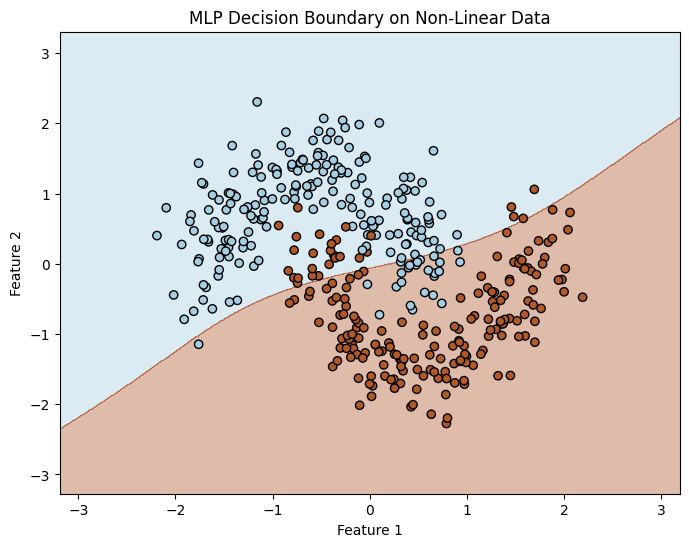

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate non-linearly separable data (moons)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define a simple MLP model
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(), # Try swapping this between nn.Sigmoid(), nn.Tanh(), or nn.ReLU()
    nn.Linear(10, 2)
)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

# Create a meshgrid to visualize decision boundary
import numpy as np

h = 0.01
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
Z = model(grid_tensor).detach().numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot decision boundary and training data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("MLP Decision Boundary on Non-Linear Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Backpropagation

In our initial discussion of how gradient descent is calculated for logistic regression we set out with the following roadmap:

---

"""Our final goals are to calculate the following:

- The derivative of the error function with respect to $W$: $\frac{\partial Error}{\partial W}$
- The derivative of the error function with respect to $b$: $\frac{\partial Error}{\partial b}$

Based on the chain rule our roadmap looks like:

$$\frac{\partial Error}{\partial W} = \sum_{i = 1}^n\frac{\partial Error}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} \frac{\partial z_i}{\partial W}$$

$$\frac{\partial Error}{\partial b} = \sum_{i = 1}^n\frac{\partial Error}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} \frac{\partial z_i}{\partial b}$$

**Finding the derivative of the error function with respect to the weights implies I need to find the derivative of the error with respect to $y_i$ ($\frac{\partial Error}{\partial y_i}$), the derivative of $y_i$ with respect to $z_i$ ($\frac{\partial \hat{y}_i}{\partial z_i}$) and the derivative of $z_i$ with respect to each weight ($\frac{\partial z_i}{\partial W}$)**

**Finding the derivative of the error function with respect to the weights implies the same steps except I need to find the derivative of $z_i$ with respect to the bias (trivial enough :smile:).**"""

---

In that case the activation function of logistic regression acted as a sort of final layer enacted on the weighted sum computed in a perceptron.

But we could apply this methodology of expanding via chain rule to a sequence of computations and activations!

In a neural network with multiple layers, we will apply the chain rule for each layer, starting from the output and moving backward to the input layer. For each layer, you compute the gradient of the error with respect to the weights and biases. The process is broken down as follows:

1. Forward Pass: Compute the activations for all layers my sending data "forwards" from left to right in the network.

2. Backward Pass: For each layer starting from the output, recursively compute the gradient of the error by applying chain rule.

3. Backpropagation: 

- Suppose three functions apply to some data input, $x$,  in the form $h(g(f(x)))$

- $f$ represents the first transformation, i.e. the first layer of our network.

- $g$ represents the hidden transformation i.e. the hidden layer of our network.

- $h$ represents the outermost layer i.e. the final transformation of our network.

If we wanted to calculate $\frac{\partial h}{\partial x}$ we would do so by applying chain rule from $h$ all the way down to $x$

<img src="./media/backpropagation_explanation_1.png" width="400px">

- **Backpropagation is just a fancy application of chain rule for the purposes of evaluating error from each layer in the network.**

- **Instead of x, imagine the actual data point, and instead of simply $f$, $g$, and $h$ imagine the error functions at each layer!**

Think of the forward pass as a series of transformations applied to your input data, producing the final output. The backpropagation process, on the other hand, is like you trying to trace how much each transformation (layer) contributed to the error in the output, and then adjusting the parameters (weights and biases) of those transformations to minimize that error.

The key idea is that the error at the output layer is caused by all of the previous layers, and to fix that error, you need to adjust the parameters at each layer. **Since each layer is a function of its previous layer (or input data), the chain rule allows you to compute how to adjust each weight and bias.**

- With more layers the depth of this chain rule computation increases significantly, but ultimately the computations of calculating the error for several nodes in the same layer can often be done in parallel via GPUs.

- There are more advanced ways to exploit the parallelizability of neural models as well!

## The ML Learning Pipeline

As discussed in prior lessons, the mathematical foundation of the learning process for models attempting to learn from a set of data is rigorously tested and technically very complex.

However, we could summarize our learnings in a few points:

- Models apply mathematical functions (i.e. weighted sums, non-linearity functions, e.t.c)

- We can measure how well a particular function (visualize it as a line in 2d space) fitted to the given data.

- As we get fed more data the function's slope or weights can be corrected to match the data to the best of our ability.

- Instead of trying to correct the function itself, we can instead map the loss of the function (i.e. the difference between each prediction and our expectations). This loss turns out to be a function itself.

- If we can minimize loss, we are inversely maximizing our correctness (which can be measured in many ways but can be generally be thought of as "best fit")

- We use gradient descent, and algorithmic technique, to find values that minimize the loss function with any given data point.

- Gradient descent operates to change the weights themselves (i.e. think of $y = mx + b$, we change the slope by modifying m, not x).

- Gradient descent works by going over the data in iterations of batches (it could update based on each datapoint, or once after each epoch over the entire dataset or choose a batch size somewhere in between).

- Advanced techniques help correct the pitfalls of classical gradient descent (which arise from problematic functions or erratic step size changes).

When you put all this together here is the process we are aiming to achieve with our code:

1) **Data preparation** (loading and preprocessing the data),

2) **Model definition / initialization** (creating the architecture like the ones in TensorFlow/PyTorch),

3) **Loss function and optimizer definition / initialization** (setting up the loss and optimization algorithm),

4) **Training loop** (iterating through epochs, updating weights, and calculating loss),

5) **Evaluation** (measuring accuracy on the validation set).

The rest of this lesson will cover examples of training a model on the **MNIST** dataset. The information regarding this dataset can be found
on these sites:

- [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)
- [Kaggle](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)
- [Tensorflow](https://www.tensorflow.org/datasets/catalog/mnist)

We will start by attempting to build a network from scratch to the best of our extent, after understanding the logic behind the raw and tediously coded version of the program we can make various optimizations within the code to accomplish the task much, much quicker (in terms of development time).

## MNIST Model from (nearly) Scratch

### Data Preparation and Analysis

Training dataset type: <class 'torchvision.datasets.mnist.MNIST'>
Number of training samples: 60000
Example in training dataset:
 (tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, 

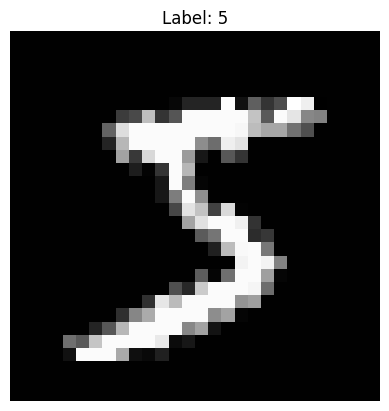

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

"""
Before doing anything else, we need to load in the MNIST data
and apply some basic transformations.
"""

# Create the transformation object (which is more like a function we will apply)
# to the image set.
transform = transforms.Compose([
    transforms.ToTensor(), # This turns each value in the applied upon array into a tensor.
    transforms.Normalize((0.5,), (0.5,)) # This normalizes pixel values from 0 to 255 to be from 0 to 1.
])

# Load MNIST data and epply the aforementioned transforms!
train_dataset = datasets.MNIST(root="./MNIST_data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./MNIST_data", train=False, download=True, transform=transform)

# Use a set of dataloader objects that act as a sort of iterator to control the flow of data (adjust the batch size)
# (This will be useful later)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check the structure of the training dataset
print(f"Training dataset type: {type(train_dataset)}")
print(f"Number of training samples: {len(train_dataset)}")

# Check the first data sample (image and label)
image, label = train_dataset[0]
print("Example in training dataset:\n", train_dataset[0])

"""

The statement above should give some insight on the form of the data!
We can see that a single image is defined by a 2D array of singular values within an array, which is
itself a tensor AND by a singular second value from 0 to 9 (that represents the true label of the data).

The fact that each image has inner most pixels represented by single values should be indicative
that the pixels are single channel (as opposed to three channels: r, g, b or 4 channels: r, g, b, a)

- Instead each image is 28 by 28 pixels, single channel (monochrome)

"""

print(f"Image shape: {image.shape}")  # Shape of the first image
print(f"Label: {label}")  # Label for the first image

"""
We can render the image sample using something like pillow (PIL) and matplotlib
"""

# Let's get a sample from the train dataset
image, label = train_dataset[0]  # Access the first image and label

# Convert the tensor to a PIL image (remove the normalization by scaling back)
print("Dimensions of image pre-squeeze: ", image.shape)
image = image.squeeze()  # Remove the channel dimension 
# (i.e. the third pair of brackets in the traditional tensor which would be useful for multiple channels but is un-necessary for monochrome), 
print("Dimensions of image post-squeeze: ", image.shape)
# now it's (28, 28) instead of (1, 28, 28) since the channel dimension is removed.
print(image)

# Pillow expects images in range [0, 255] for uint8 format, so we scale the tensor to that range
image = transforms.ToPILImage()(image)  # Converts tensor to a PIL Image

# Optionally, you can also visualize it using matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axes
plt.show()

### Defining the Linear Neural Network

In [10]:
from torch import nn

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        
        # Input to hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()  # Activation function
        
        # Hidden to output layer
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Pass through the network
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


### Initializing components of training (model, optimizer, regularization, e.t.c.)

In [ ]:
import time

"""

Our model accepts inputs in the form of a singular dimension array.

This means we have to flatten our 28 by 28 image into a single dimensional array equivalent which will have a length of 784.

Our single hidden layer can any number of nodes

Our output layer should have 10 nodes, each of which corresponds to a number (0-9)

"""

# Configure and initialize the model
input_size, hidden_size, output_size = 28*28, 100, 10
model = SimpleNN(input_size, hidden_size, output_size)


# Initialize the loss function (often also called "criterion")
loss_function = nn.CrossEntropyLoss()

# For now lets stick with no optimization (i.e. SGD or ADAM) and define the hard coded learning rate
lr = 0.01

# With our hyperparameters (in this case just the learning rate) set up, lets loop!
n_epochs = 10

# Lets time our training process for fun
start = time.time()

for epoch in range(n_epochs):
    # We go through the entire dataset by iterating several times
    # over the loader. Think of the loader as a valve that moderates the
    # batch size as we initialized it from before (64 samples per iteration).
    for images, labels in train_loader:
        
        # Perform a forward pass by getting outputted values and then computing loss (the hard part)
        # Flatten images to 1D (28*28)
        images = images.view(-1, 28*28) # (First flatten the image)
        outputs = model(images)
        loss = loss_function(outputs, labels)
        
        # Then backpropagate (assign the loss)
        loss.backward()
    
        # Update the weights manually
        with torch.no_grad(): # this disables gradient tracking (we only care about current grad) and changing it
            for param in model.parameters(): # go through each parameter (neuron)
                param -= lr * param.grad # GRADIENT DESCENT BABY!
        
        
        # Clear up the gradients (i.e. reset them) for the next batch coming in
        model.zero_grad()
        
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

print(f"Time taken for training: {time.time() - start}")


Epoch [1/10], Loss: 0.3338
Epoch [2/10], Loss: 0.5361
Epoch [3/10], Loss: 0.1860
Epoch [4/10], Loss: 0.0688
Epoch [5/10], Loss: 0.1376
Epoch [6/10], Loss: 0.1247
Epoch [7/10], Loss: 0.2979
Epoch [8/10], Loss: 0.2205
Epoch [9/10], Loss: 0.1941
Epoch [10/10], Loss: 0.1599
Time taken for training: 35.81488490104675


### Observations from the Training Process

Training a neural network like the one above can feel slow and tedious, especially on older hardware. This is because, as we’ve discussed, neural networks involve a large number of parameters that can, and ideally *should*, be processed in parallel using GPUs. Most modern mid to high-end chips have integrated graphics that can handle light ML workloads, but I recommend investing in an affordable dedicated GPU such as an RTX 3050 because it will outperform nearly all integrated GPUs.

- If you want to leverage a GPU for ML, remember: both the model and the data must reside on the GPU. This means each time you fetch a new batch from your DataLoader, you should move it to the GPU or better yet set the GPU as your default device from the start!

- You’ve likely noticed the importance of .grad and .backward() in the training loop.

- **When updating weights, we use no_grad() because we don’t want to track gradients during the update itself.**

- After processing a batch, we’ve incorporated its contribution into the model. Therefore, we reset the gradients to ensure the next .backward() call computes fresh gradients based on the updated weights.

- Notice that we aren’t using any optimizer here to adjust the learning rate (which is considered a hyperparameter).

- Optimizers like SGD or Adam manage learning rate adjustments internally using strategies we’ve discussed.

- We can also apply regularization to the weights: L2 regularization integrates directly with most optimizers, while L1 regularization typically requires adding a manual penalty term to the loss.

- **It’s good practice to stop training early once the model reaches a satisfactory loss level — this prevents overtraining and saves time. The n_epochs parameter then becomes an upper limit rather than a fixed count of iterations.**

- While you could stop at a simple loss threshold, a more robust approach is to use early stopping with patience, which waits for sustained improvement before halting training.

- Even with just one hidden layer, having 100 hidden nodes means about $100 \times 784 \times 10 = 784{,}000$ computations per epoch for each forward pass. Reducing model complexity scales down training time proportionally.

Lets create the a significantly more optimized training process based on these optimizations (including shifting data over to the GPU if one is found)

## Optimized MNIST model training

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model hyperparameters
input_size, hidden_size, output_size = 28*28, 40, 10
learning_rate = 0.01
weight_decay = 1e-4  # L2 regularization strength
n_epochs = 50  # Max epochs (change this to a lower number if you do not have a discrete GPU)
batch_size = 64
target_loss = 0.05  # Stop if loss stays below this
patience = 3  # Number of epochs to wait before stopping

# Load dataset with transforms
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

# Initialize model and move to GPU if available
model = SimpleNN(input_size, hidden_size, output_size).to(device)

# Loss function
loss_function = nn.CrossEntropyLoss()

# Choose optimizer (Adam or SGD)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # Uncomment for SGD

# Training loop with early stopping
consecutive_below_threshold = 0

for epoch in range(n_epochs):
    epoch_loss = 0
    num_batches = 0
    
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)
        
        # Flatten images to 1D (28*28)
        images = images.view(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = loss_function(outputs, labels)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track average loss
        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}")

    # Check if loss stays below target for multiple epochs
    if avg_loss < target_loss:
        consecutive_below_threshold += 1
        if consecutive_below_threshold >= patience:
            print(f"Early stopping triggered! Loss has been below {target_loss} for {patience} consecutive epochs.")
            break
    else:
        consecutive_below_threshold = 0  # Reset if loss rises again

print("Training over!")

Using device: cuda
Epoch [1/50], Loss: 0.2661
Epoch [2/50], Loss: 0.1662
Epoch [3/50], Loss: 0.1460
Epoch [4/50], Loss: 0.1342
Epoch [5/50], Loss: 0.1340
Epoch [6/50], Loss: 0.1288
Epoch [7/50], Loss: 0.1297
Epoch [8/50], Loss: 0.1250
Epoch [9/50], Loss: 0.1250
Epoch [10/50], Loss: 0.1209
Epoch [11/50], Loss: 0.1211
Epoch [12/50], Loss: 0.1230
Epoch [13/50], Loss: 0.1202
Epoch [14/50], Loss: 0.1196
Epoch [15/50], Loss: 0.1214
Epoch [16/50], Loss: 0.1192
Epoch [17/50], Loss: 0.1189
Epoch [18/50], Loss: 0.1169
Epoch [19/50], Loss: 0.1193
Epoch [20/50], Loss: 0.1172
Epoch [21/50], Loss: 0.1177
Epoch [22/50], Loss: 0.1141
Epoch [23/50], Loss: 0.1168
Epoch [24/50], Loss: 0.1202
Epoch [25/50], Loss: 0.1162
Epoch [26/50], Loss: 0.1167
Epoch [27/50], Loss: 0.1150
Epoch [28/50], Loss: 0.1146
Epoch [29/50], Loss: 0.1155
Epoch [30/50], Loss: 0.1168
Epoch [31/50], Loss: 0.1205
Epoch [32/50], Loss: 0.1165
Epoch [33/50], Loss: 0.1184
Epoch [34/50], Loss: 0.1159
Epoch [35/50], Loss: 0.1151
Epoch [36/

## The Big Caveats

The model that we have created and optimzed uses the Pytorch framework which is often favored in academic contexts for its more customizable and less abstracted approach of constructing and training models.

- However in production environments most developers, data scientists included, want a plug and play solution that *can* be customizable but does not force you to customize.

Tensorflow is considered the ideal library to this extent and is written is C++ but has APIs and bindings for a wide variety of languages.

- While **both PyTorch and Tensorflow are written in C++ to be as close to the hardware as possible, Pytorch encourages a more build it yourself approach compared to recent features in TensorFlow.** Tensorflow has tighter integration across the Google ecosystem and in general production technologies and languages like Java and .NET (C#).

So although I don't favor TensorFlow's approach, it's nonetheless important to understand code that is most equivalent to the one above, but in Tensorflow.

Before jumping in lets briefly mention **Keras**!

- If PyTorch allows you to mold your own bricks with no real templates, Keras is Tensorflow's solution to provide brick templates and building blocks to make wholesale models.

### (Tensorflow's) Keras vs PyTorch

- Keras is described as **declarative and high level** where models can be defined and constructed like a LEGO set using its API.

- Keras models are compiled statically prior to training.

- The **.fit() function in Keras can completely abstract away the entire training loop we defined**.

- **Keras is great for prototyping and quick deploys / tests**

- In most use cases you don't need to modify / override the API behavior since the API acts akin to a **Builder pattern and lets you make any model by combining components that are already predefined (its like making a mecha)**.

- However *if* you wanted fine-grained control you could just override `keras.Model`

In contrast, PyTorch is more object-oriented and dynamic, allowing for fine-tuned control and modification of the entire training process. This makes it ideal for researchers and developers who need flexibility in defining custom training logic.

As a TensorFlow developer, you’re not forced to use the Keras API, but its presence greatly improves prototyping and testing workflows. Without Keras, you’d have to manually implement many of the abstractions it provides, making development more complex and time-consuming.

## Tensorflow Equivalent Optimized MNIST Training Loop

Using device: GPU
Epoch [1/50], Loss: 0.2596
Epoch [2/50], Loss: 0.1595
Epoch [3/50], Loss: 0.1314
Epoch [4/50], Loss: 0.1183
Epoch [5/50], Loss: 0.1080
Epoch [6/50], Loss: 0.1041
Epoch [7/50], Loss: 0.0984


2025-06-16 11:06:46.591397: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [8/50], Loss: 0.0875
Epoch [9/50], Loss: 0.0845
Epoch [10/50], Loss: 0.0799
Epoch [11/50], Loss: 0.0853
Epoch [12/50], Loss: 0.0769
Epoch [13/50], Loss: 0.0724
Epoch [14/50], Loss: 0.0696
Early stopping triggered! Loss has been below 0.08 for 3 consecutive epochs.
Training over!


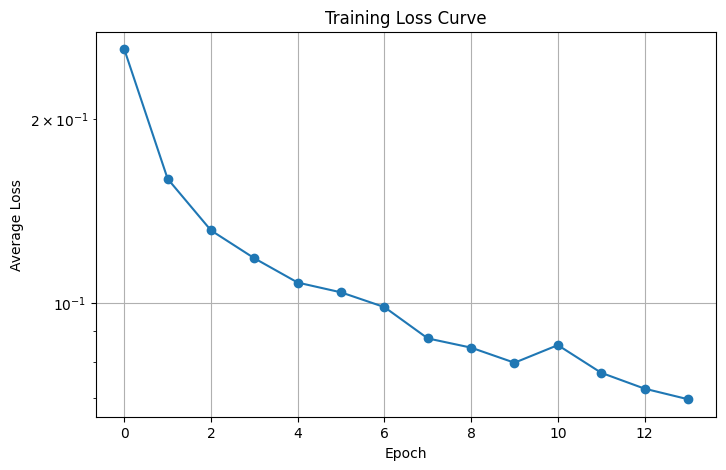

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Check if GPU is available
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print(f"Using device: {device}")

# Hyperparameters
input_size = 28 * 28
hidden_size = 50
output_size = 10
learning_rate = 0.01
weight_decay = 1e-4  # L2 regularization
n_epochs = 50  # Max epochs
batch_size = 64
target_loss = 0.08  # Stop if loss stays below this
patience = 3  # Consecutive epochs below target before stopping

# Load MNIST dataset
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0  # Normalize
x_train = x_train.reshape(-1, input_size)  # Flatten
y_train = y_train.astype(np.int32)  # Ensure labels are integer

# Create a TensorFlow dataset and batch it
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(batch_size)

# Define model using the Functional API (more flexible than Sequential)
inputs = keras.Input(shape=(input_size,))
hidden = keras.layers.Dense(hidden_size, activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay))(inputs)
outputs = keras.layers.Dense(output_size)(hidden)

# Build model
model = keras.Model(inputs=inputs, outputs=outputs)

# Define loss and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)  # Swap with SGD if needed

# Custom training loop
consecutive_below_threshold = 0  # Track early stopping condition

# Lets also track the loss history
loss_history = []

for epoch in range(n_epochs):
    epoch_loss = 0
    num_batches = 0

    for batch_x, batch_y in train_dataset: # type: ignore
        with tf.GradientTape() as tape:
            logits = model(batch_x, training=True)
            loss = loss_fn(batch_y, logits)

        # Compute gradients and update weights
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Track loss
        epoch_loss += loss.numpy()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    loss_history.append(avg_loss) # Store the average loss in a history series
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}")

    # Early stopping condition
    if avg_loss < target_loss:
        consecutive_below_threshold += 1
        if consecutive_below_threshold >= patience:
            print(f"Early stopping triggered! Loss has been below {target_loss} for {patience} consecutive epochs.")
            break
    else:
        consecutive_below_threshold = 0  # Reset if loss rises

print("Training over!")

plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.yscale('log') # This line is optional but it makes the y-scale logarithmic (try commenting it and see what happens)
plt.grid(True)
plt.show()


In [4]:
# The code below tests the trained model!

# Load test data (we skipped it earlier with the "_")
_, (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess test data
x_test = x_test.astype(np.float32) / 255.0  # Normalize
x_test = x_test.reshape(-1, input_size)     # Flatten
y_test = y_test.astype(np.int32)

# Create TensorFlow dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Evaluate accuracy
correct = 0
total = 0

for batch_x, batch_y in test_dataset:
    logits = model(batch_x, training=False)
    preds = tf.argmax(logits, axis=1, output_type=tf.int32)
    correct += tf.reduce_sum(tf.cast(preds == batch_y, tf.int32)).numpy()
    total += batch_x.shape[0]

accuracy = correct / total
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9606


## Introduction to Convolutional Neural Networks

In classical multi-layer perceptron (MLP) networks, our inputs must be *flat*: each input neuron receives a single feature without any intrinsic understanding of how that feature relates to the others.

- For inputs where the data points are entirely independent or unordered, this may be perfectly acceptable.

However, in the case of images, the relationship between two pixels depends heavily on their relative positions (their **locality** within the image). How can we design a neural network that not only accepts image data but also preserves and leverages this information about pixel positions?

Consider a simple grayscale image of **256×256** pixels:
- This would give us **196,608 input features** (256 × 256 = 65,536; add 3 channels for RGB → 196,608).
- If we connected each input to **1,000 neurons in the first hidden layer**, that would mean nearly **197 million parameters** just for that one layer!

Humans don’t identify objects by examining pixels individually. Instead, we recognize patterns that form meaningful structures across different regions of an image.

Let’s take a **dog** as an example:
- We identify a dog by the combination of its **head**, **body**, and **tail**.
- The head might have a long snout, bead-like eyes, floppy ears, and sometimes a tongue sticking out.
- The body might show soft fur, an oblong shape, and typical color patterns like black, brown, gold, or white — plus four legs.
- The tail might be straight or curly, but is generally longer than that of smaller animals like rabbits.

We can break this down further:
- Each of these parts — head, body, tail — can be described in terms of smaller features (like the shape of an ear or the curve of a tail).
- Eventually, we might say that *specific patterns of pixels* define what we recognize as a dog.

**The key idea:**  

Humans intuitively decompose objects into patterns and sub-patterns.
- **Convolutional Neural Networks (CNNs)** attempt to *reverse engineer* this intuition.
- CNNs scan the image for small, local patterns, then combine them hierarchically into more abstract features — much like how our eyes and brain work together to recognize objects.
- The idea is to **look through an image in chunks to see how close that chunk of an image is to a feature you're looking for**, in the process you end up creating something called a **feature map**.

<img src="./media/CNN_visualization.gif" width="500px">

---

### Kernels, Filters, and Features

To do this, CNNs rely on a few key components:

- **Kernels** (or **filters**): small, learnable matrices that slide (or *convolve*) across the image. Each kernel scans for a specific pattern, like an edge, a texture, or a corner.
- **Features**: the output of applying these kernels to the input image. You can think of these as the *maps* of where particular patterns were detected in the image.

The filter defines what we are looking for, for simple features such as corners or edges, our filter could be pretty simple and small. 

Here is an image which shows some simple 3 by 3 filters.

<img src="./media/first_level_features_in_CNN.webp" width="500px">

**The process by which we sweep our filter across the image is called convolution (hence the name Convolutional Neural Networks)**

- When the kernel is superimposed on a part of the image, the mathematical operation used to generate a singular number (feature) out of the portion of the image and the applied kernel is the **dot product**.

- - We compute **element-wise products between the kernel values and the corresponding patch pixel values**.
- - We **sum these products to get a single scalar at that location**.
- - This is mathematically equivalent to taking the dot product of two vectors: the flattened kernel and the flattened patch.

Suppose two matrices:

The kernel matrix:

$$
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1 \\
\end{bmatrix}
$$

The image patch's matrix:

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
$$

Our singular feature would be calculated as: $-1 \cdot 1 + -1 \cdot 2 + -1 \cdot 3 + 0 \cdot 4 + 0 \cdot 5 + 0 \cdot 6 + 1 \cdot 7 + 1 \cdot 8 + 1 \cdot 9 = 18$

Of course in practice the pixel values in the kernel and the picture may range from 0 to 1 if the image has a single, alpha channel. However for traditional images with multiple channels, multiplying the values in one pixel by that of a kernel may have much more nuanced effects.

- In the prior example, the kernel was filtering for a **horizontal edge at the bottom**, it accomplished this by giving a positive weight to the row of pixels at the bottom of the window, giving no (0) weight to the row in the middle of the window, and negative weights to the row of pixels at the top of the window.

- - **Alternatively the kernel could have given 0 weight to both of the top two rows and positive weight to the bottom row. But why would this be less effective?**

<details>
<summary> Click for Answer! </summary>
<p>
    An alternative kernel that gives zero weight to the top two rows and positive weight only to the bottom row would not detect edges as effectively. 
    Instead of highlighting <em>changes</em> between regions, it would simply emphasize areas where the bottom row has high pixel values — 
    even if the top rows are similar. <b>Effective edge detection relies on comparing regions looking for sharp differences between areas 
    and this is why kernels are designed to include both positive and negative weights.</b>
</p>
</details>

Our kernel (or filter) acts as a weighted sum function, where the adjustable parameters are the values within the kernel itself, and the data is the patch of the image the kernel is applied to.

---

### Key points

- When training a convolutional neural network, we tune each kernel on the same layer independently. **Each kernel acts as its own trainable function, scanning the image and producing a feature map, which will be combined with other features in the same level of the network.**

- **However, only the first layer of kernels interacts directly with the image. Higher-level kernels act on the abstractions captured in the feature maps generated by lower-level kernels, allowing the network to build increasingly complex representations.**

**The final dog probability is computed from a weighted combination of all these aggregated high-level features, not just one map.**

Here are a few key questions to consider as we talk about CNNs in later lessons:

- Is there an art to how we tell the kernel to scan over the image? Should there be less or no overlap in each patch it scans? 
- - How does this affect the size of the output feature map? 
- - What if an instance of "scanning" and applying the kernel results in the kernel going out of the image's bounds?

- How do we downsize the resulting feature maps if they become too large or cumbersome?

- Do the steps describe so far prevent CNNs from having issues with representing non-linear relationships, if not, how can we address the issue?

- Even if we can detect low-level features, how exactly are these combined to represent more abstract patterns or objects?

- Is there an intuitive, visual way to see what a kernel is “looking at” over the image — like a heatmap that shows its focus across the input?